In [1]:
import pandas as pd
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv(r'C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv')
train.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7338.23   
1   1586386800000  2020-04-08 23:00:00  BTCUSD  7367.28  7398.92  7348.47   
2   1586383200000  2020-04-08 22:00:00  BTCUSD  7337.19  7390.25  7322.87   
3   1586379600000  2020-04-08 21:00:00  BTCUSD  7327.70  7370.00  7311.33   
4   1586376000000  2020-04-08 20:00:00  BTCUSD  7320.11  7375.72  7313.66   

     Close      Volume  
0  7338.23    7.788915  
1  7369.60   66.558293  
2  7367.28   88.486108  
3  7337.19   35.551553  
4  7327.70  153.655811

In [3]:
train['Date'] = pd.to_datetime(train['Date'])

In [7]:
train.drop(train[train['Volume'] == 0].index, inplace = True)
train.drop(['Unix Timestamp','Symbol'],axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
                      Close
Date                       
2015-10-08 13:00:00  245.00
2015-10-08 14:00:00  245.00
2015-10-08 15:00:00  244.92
2015-10-08 16:00:00  244.25
2015-10-08 17:00:00  244.99


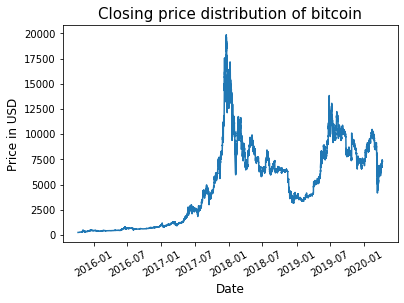

In [8]:
data = train['Close']
Date1 = train['Date']
train1 = train[['Date','Close']]
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())
#plot.figure(figsize = (15,10))
plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.xticks(rotation = 30)
plot.show()

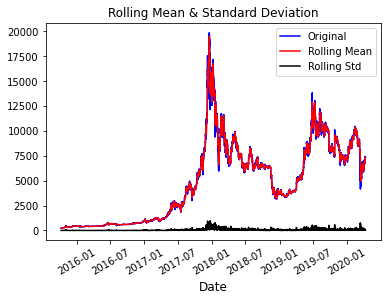

ADF Stastistic: -1.721943
p-value: 0.419844
The graph is non stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.xticks(rotation = 30)
    plot.xlabel('Date', fontsize=12)
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x, autolag='AIC')
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['Close']      
test_stationarity(ts)

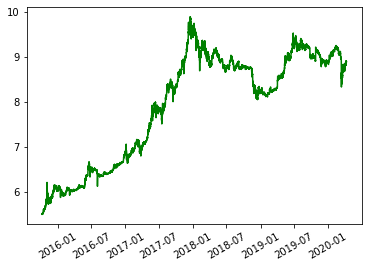

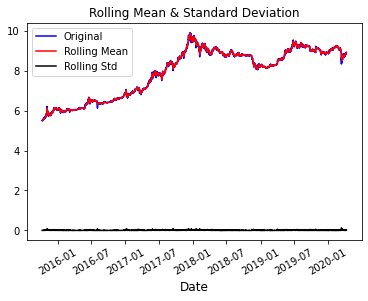

ADF Stastistic: -2.018345
p-value: 0.278588
The graph is non stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [10]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.xticks(rotation = 30)
plot.show()

test_stationarity(ts_log)

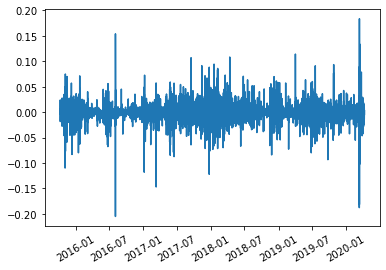

In [11]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.xticks(rotation = 30)
plot.show()

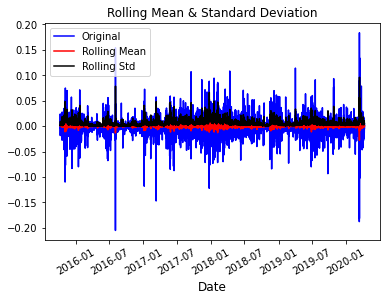

ADF Stastistic: -32.125981
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [12]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [13]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


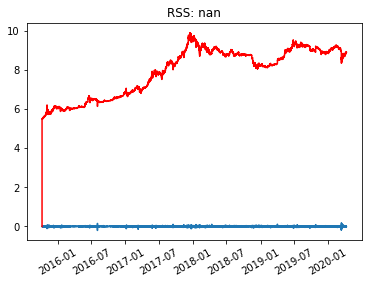

In [14]:
# follow lag
model = sm.tsa.arima.ARIMA(ts_log, order=(1,1,0))  
#results_ARIMA = model.fit(disp=-1)  
results_ARIMA = model.fit() 
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.xticks(rotation=30)
plot.show()

In [15]:
len(ts_log)

38372

Printing Predicted vs Expected Values...


predicted = 3573.242115,   expected = 3570.460000,   error = 0.077920  %
predicted = 3570.745239,   expected = 3579.900000,   error = 0.255727  %
predicted = 3579.372043,   expected = 3573.880000,   error = 0.153672  %
predicted = 3573.910605,   expected = 3580.670000,   error = 0.188775  %
predicted = 3580.454270,   expected = 3585.520000,   error = 0.141283  %
predicted = 3584.931993,   expected = 3556.350000,   error = 0.803689  %
predicted = 3558.090937,   expected = 3556.380000,   error = 0.048109  %
predicted = 3557.513356,   expected = 3560.020000,   error = 0.070411  %
predicted = 3559.777068,   expected = 3564.720000,   error = 0.138663  %
predicted = 3564.265313,   expected = 3566.810000,   error = 0.071343  %
predicted = 3566.487342,   expected = 3565.850000,   error = 0.017873  %
predicted = 3565.832049,   expected = 3566.460000,   error = 0.017607  %
predicted = 3566.457017,   expected = 3565.840000,   error = 0.017304  %
predicte

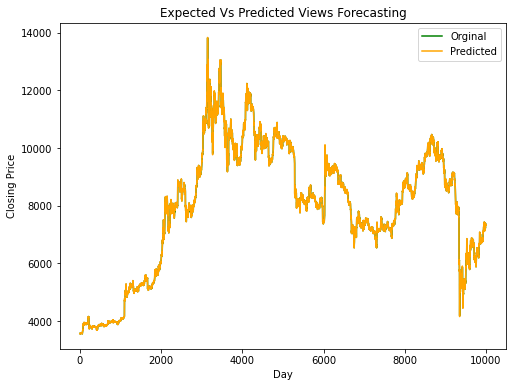

In [16]:
size = int(len(ts_log)-10000)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()